# How to use jupyter notebook files

Select cell and press m to markdown mode
                press a to insert cell above
                press esc + b to create a new cell
                press d + d to delete cell
                press c + c + v to create duplicate of cell

press    cmd + enter to execute cell
press option + enter to execute cell + create a new cell

# Load the data frame

In [4]:
from pandas import read_csv

In [5]:
data_frame = read_csv('data_small/TG_STAID000001.txt', skiprows=20, parse_dates=['    DATE'])

In [6]:
data_frame

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


# Show certain rows

In [5]:
data_frame[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


## Returns data frame Series object

In [7]:
data_frame['   TG']

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

## Returns data frame object

In [8]:
data_frame[['   TG', '    DATE']]

,TG,DATE
0,21,1860-01-01
1,46,1860-01-02
2,31,1860-01-03
3,37,1860-01-04
4,31,1860-01-05
...,...,...
59316,-9999,2022-05-27
59317,-9999,2022-05-28
59318,-9999,2022-05-29
59319,-9999,2022-05-30


# Simple statistics and filtering

In [9]:
filtered_temperature = data_frame.loc[data_frame['   TG'] != -9999]['   TG'] / 10

In [10]:
filtered_temperature.mean()

6.360787526128468

In [11]:
filtered_temperature.max()

26.2

In [12]:
filtered_temperature.min()

-28.8

## Create histogram

<AxesSubplot: >

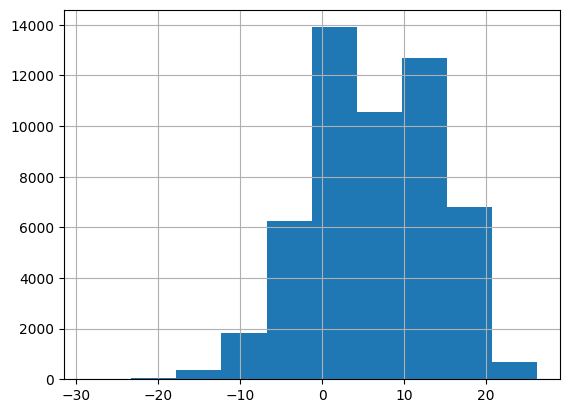

In [13]:
filtered_temperature.hist()

# Get certain cells

In [14]:
data_frame.loc[data_frame['    DATE'] == '1860-01-05']['   TG'].squeeze() / 10

3.1

In [15]:
data_frame.loc[data_frame['   TG'] == data_frame['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

In [16]:
data_frame.loc[3, '   TG']

37

# Calculate a new column out of existing column

In [17]:
from numpy import nan

data_frame['TG_IN_CELSIUS'] = data_frame['   TG'].mask(data_frame['   TG'] == -9999, nan) / 10

In [18]:
data_frame

,STAID,SOUID,DATE,TG,Q_TG,TG_IN_CELSIUS
0,1,35381,1860-01-01,21,0,2.1
1,1,35381,1860-01-02,46,0,4.6
2,1,35381,1860-01-03,31,0,3.1
3,1,35381,1860-01-04,37,0,3.7
4,1,35381,1860-01-05,31,0,3.1
...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN
59317,1,35381,2022-05-28,-9999,9,NaN
59318,1,35381,2022-05-29,-9999,9,NaN
59319,1,35381,2022-05-30,-9999,9,NaN


In [19]:
data_frame['TG_IN_FAHRENHEIT'] = data_frame['TG_IN_CELSIUS'] * (9 / 5) + 32

In [20]:
data_frame

,STAID,SOUID,DATE,TG,Q_TG,TG_IN_CELSIUS,TG_IN_FAHRENHEIT
0,1,35381,1860-01-01,21,0,2.1,35.78
1,1,35381,1860-01-02,46,0,4.6,40.28
2,1,35381,1860-01-03,31,0,3.1,37.58
3,1,35381,1860-01-04,37,0,3.7,38.66
4,1,35381,1860-01-05,31,0,3.1,37.58
...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN


# Plotting

<AxesSubplot: xlabel='    DATE'>

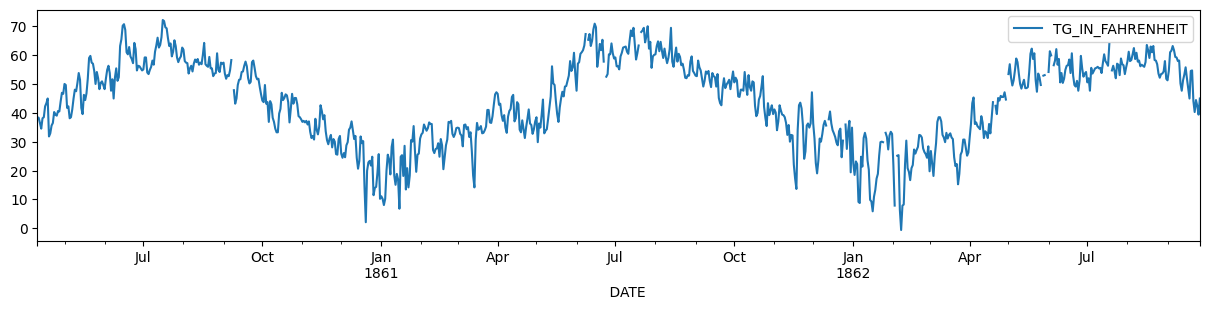

In [23]:
data_frame[100: 1000].plot(x='    DATE', y='TG_IN_FAHRENHEIT', figsize=(15, 3))